In [1]:
from Program import Program, Instruction
import Selection
import random
import pickle
import math

In [2]:
with open('saved_generations/generationBest.pkl', 'rb') as input_file:
    population = pickle.load(input_file)

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data_banknote_authentication.csv')
target = data.iloc[:,-1]
data2   = data.iloc[:,:-1]
X_train, X_test1, y_train, y_test1 = train_test_split(data, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test       = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [67]:
data

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
from sklearn.metrics import roc_auc_score
def f3(program, cases=X_train.values, labels=y_train.values):
    outs = []
    for row in range(len(cases)):
        tv = labels[row]           #true value of sin for the fitness case
        #print(program)
        program.reset()             #return value of the program evaluated on the fitness case
        program._set_inputs(cases[row])
        #print(program)
        rv = program.execute()
        outs.append(rv) 
    if (max(outs) - min(outs) != 0):
        outs = [(float(i)-min(outs))/(max(outs)-min(outs)) for i in outs]
    elif max(outs) != 0:
        outs = [(float(i))/(max(outs)) for i in outs]
    fitness1 = roc_auc_score(labels, outs)

    return fitness1

In [5]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Plot method fromhttps://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/sklearn/sklearn_logistic_regression_vs_gbm.ipynb#scrollTo=-aBbV0bWBxwc
import matplotlib.pyplot as plt
def plot_roc_and_precision_recall(y_true, y_score):
    # Get ROC curve FPR and TPR from true labels vs score values
    fpr, tpr, _ = roc_curve(y_true, y_score)

    # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
    roc_auc = auc(fpr, tpr)

    # Calculate precision and recall from true labels vs score values
    precision, recall, _ = precision_recall_curve(y_true, y_score)

    plt.figure(figsize=(8, 3))

    plt.subplot(1,2,1)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.step(recall, precision, color='orange', where='post')
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.grid(True)

    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom part of the subplots of the figure
    top = 0.9      # the top part of the subplots of the figure
    wspace = 0.5   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show()

    

#plot_roc_and_precision_recall(y_test, outs)  # provide the column for the scores belonging only to the positive class
#print()

In [7]:
this_gen_fitness_c = []
i = 1
for individual in population:
    print(i, '\\', len(population))
    i += 1
    ind_fit = f3(individual)
    this_gen_fitness_c.append(ind_fit)
ordered = Selection.elite_selection(population, f3, X_train.values, pop_fitnesses=this_gen_fitness_c, k=int(len(population)), opt_max=True)

1 \ 1250
2 \ 1250
3 \ 1250
4 \ 1250
5 \ 1250
6 \ 1250
7 \ 1250
8 \ 1250
9 \ 1250
10 \ 1250
11 \ 1250
12 \ 1250
13 \ 1250
14 \ 1250
15 \ 1250
16 \ 1250
17 \ 1250
18 \ 1250
19 \ 1250
20 \ 1250
21 \ 1250
22 \ 1250
23 \ 1250
24 \ 1250
25 \ 1250
26 \ 1250
27 \ 1250
28 \ 1250
29 \ 1250
30 \ 1250
31 \ 1250
32 \ 1250
33 \ 1250
34 \ 1250
35 \ 1250
36 \ 1250
37 \ 1250
38 \ 1250
39 \ 1250
40 \ 1250
41 \ 1250
42 \ 1250
43 \ 1250
44 \ 1250
45 \ 1250
46 \ 1250
47 \ 1250
48 \ 1250
49 \ 1250
50 \ 1250
51 \ 1250
52 \ 1250
53 \ 1250
54 \ 1250
55 \ 1250
56 \ 1250
57 \ 1250
58 \ 1250
59 \ 1250
60 \ 1250
61 \ 1250
62 \ 1250
63 \ 1250
64 \ 1250
65 \ 1250
66 \ 1250
67 \ 1250
68 \ 1250
69 \ 1250
70 \ 1250
71 \ 1250
72 \ 1250
73 \ 1250
74 \ 1250
75 \ 1250
76 \ 1250
77 \ 1250
78 \ 1250
79 \ 1250
80 \ 1250
81 \ 1250
82 \ 1250
83 \ 1250
84 \ 1250
85 \ 1250
86 \ 1250
87 \ 1250
88 \ 1250
89 \ 1250
90 \ 1250
91 \ 1250
92 \ 1250
93 \ 1250
94 \ 1250
95 \ 1250
96 \ 1250
97 \ 1250
98 \ 1250
99 \ 1250
100 \ 1250
101 \ 12

In [9]:
program=ordered[0]
outs = []
for row in range(len(X_test.values)):
    tv = y_test.values[row]           #true value of target for the fitness case
    #print(program)
    program.reset()             #return value of the program evaluated on the fitness case
    program._set_inputs(X_test.values[row])
    #print(program)
    rv = program.execute()
    outs.append(rv) 
if (max(outs) - min(outs) != 0):
    outs = [(float(i)-min(outs))/(max(outs)-min(outs)) for i in outs]
elif max(outs) != 0:
    outs = [(float(i))/(max(outs)) for i in outs]
fitness_c = roc_auc_score(y_test.values, outs)
fitness_c

0.9487071683834349

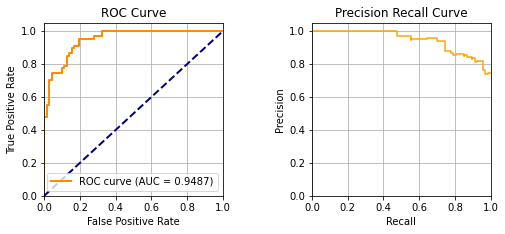

In [10]:
plot_roc_and_precision_recall(y_test, outs)  # provide the column for the scores belonging only to the positive class


In [15]:
import xgboost as xgb
import sklearn
clf = xgb.XGBClassifier()

In [16]:
clf.fit(X_train.values, y_train.values)

[11:09:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

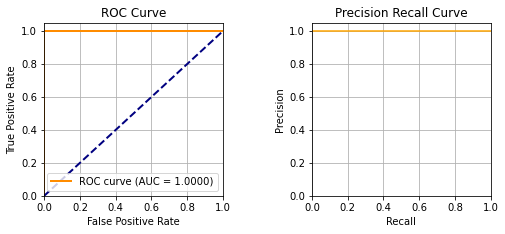

In [20]:
outsxgb = clf.predict_proba(X_test.values)[:,1]
plot_roc_and_precision_recall(y_test.values, outsxgb)

In [77]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
dataF = load_breast_cancer(as_frame=True)['data']
dataBC  = load_breast_cancer()['data']
targetBC = load_breast_cancer()['target']

In [78]:
from sklearn.model_selection import train_test_split
X_trainBC, X_test1BC, y_trainBC, y_test1BC = train_test_split(dataBC, targetBC, test_size=0.2, random_state=42)
X_valBC, X_testBC, y_valBC, y_testBC       = train_test_split(X_test1BC, y_test1BC, test_size=0.5, random_state=42)

In [83]:
print(dataBC.shape)
print(X_trainBC.shape)
print(X_valBC.shape)
print(X_testBC.shape)
print('---------------')
print(targetBC.shape)
print(y_trainBC.shape)
print(y_valBC.shape)
print(y_testBC.shape)

(569, 30)
(455, 30)
(57, 30)
(57, 30)
---------------
(569,)
(455,)
(57,)
(57,)


In [52]:
clfbc = xgb.XGBClassifier()
clfbc.fit(X_trainBC, y_trainBC)

[11:44:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Allen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

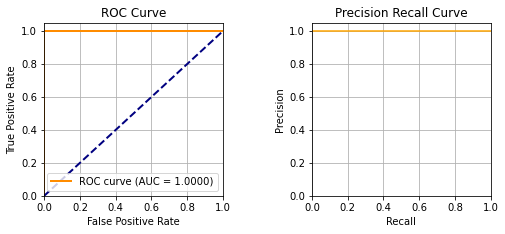

In [54]:
outsxgbbc = clfbc.predict_proba(X_testBC)[:,1]
plot_roc_and_precision_recall(y_testBC, outsxgbbc)

C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


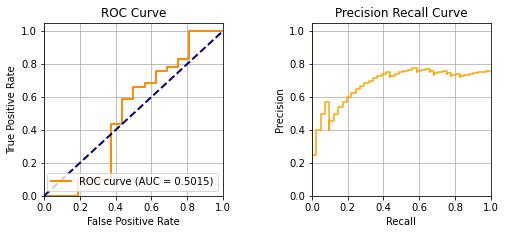

In [69]:
from sklearn.linear_model import LogisticRegression
clflr = LogisticRegression()
clflr.fit(X_trainBC, y_trainBC)
rand_guess = [random.random() for i in range(len(y_testBC))]
outslrbc = clflr.predict_proba(X_testBC)[:,1]
plot_roc_and_precision_recall(y_testBC, rand_guess)


In [75]:
roc_auc_score(y_testBC, outslrbc) 

1.0

In [43]:
X_trainBC[0].shape

(30,)

In [49]:
X_testBC[0].shape

(30,)

In [68]:
dataBC.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [70]:
program

[2.7908, 0.43922537263627826, 0.0, -0.07166403898523721, 0.7725587059696115, 0.3857188643822235, -1.0, 1.0, 1.0, 0.12319049889869454, 0.0, -1.0, 1.2806963574441748, 1.0, 0.0, 0.19866933079506122, 0.8789531875871499, 0.43922537263627826, 0.7725587059696115, 0.0, -1.0, 0.0, 0.3149466775072201, -1.0, -1.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, -2.7908, -5.7133, 5.953, 0.45946]
Mean(25,22,21)
Neq(15,23,4)
Add(27,1,4)
Sqrt(27,26,16)
Sub(21,30,0)
Eq(12,4,19)
Eq(10,9,5)
Min(22,21,23)
Log(16,0,22)
Not(21,12,18)
Sin(23,23,9)
Neq(9,13,3)
Mul(25,26,22)
Eq(19,6,6)
Sub(21,30,0)
Lt(14,4,8)
Sqr(18,0,15)
Log(16,0,22)
Sin(9,29,12)
Mul(25,26,22)
Mean(25,22,21)
Sub(25,2,5)
Lt(14,4,8)
Eq(3,4,19)
Log(16,0,22)
Mean(27,19,17)
Log(27,21,22)
Min(27,1,4)
Mean(25,22,21)
Neq(15,23,4)
Sub(10,6,20)
Add(5,0,8)
Mean(25,2,5)
Or(11,28,23)
Not(6,13,19)
Sqr(1,9,21)
Eq(21,5,15)
Sin(25,21,3)
Sqr(12,3,1)
Sqr(19,9,10)
Min(4,7,11)
Or(14,3,4)
Max(18,13,18)
Neq(28,21,7)
Sqr(4,2,10)
Neq(28,3,17)
Neq(17,10,17)
Or(23,7,13)
Mul(

In [71]:
program.print_effective_program()

[2.7908, 0.43922537263627826, 0.0, -0.07166403898523721, 0.7725587059696115, 0.3857188643822235, -1.0, 1.0, 1.0, 0.12319049889869454, 0.0, -1.0, 1.2806963574441748, 1.0, 0.0, 0.19866933079506122, 0.8789531875871499, 0.43922537263627826, 0.7725587059696115, 0.0, -1.0, 0.0, 0.3149466775072201, -1.0, -1.0, 1.0, 0.5, 0.3333333333333333, 0.25, 0.2, -2.7908, -5.7133, 5.953, 0.45946]
Add(27,1,4)
Eq(12,4,19)
Min(22,21,23)
Sin(23,23,9)
Eq(19,6,6)
Sin(9,29,12)
Or(11,28,23)
Not(6,13,19)
Sqr(1,9,21)
Sin(25,21,3)
Sqr(12,3,1)
Or(14,3,4)
Neq(28,21,7)
Sqr(4,2,10)
Or(23,7,13)
Eq(19,6,6)
Mul(25,26,22)
Mean(25,22,21)
Sub(10,6,20)
Sqrt(27,26,16)
Sqr(13,28,10)
Sub(21,30,0)
Lt(0,13,21)
Not(21,12,18)
Sin(23,23,9)
Sub(21,27,0)
Add(16,0,22)
Sin(9,29,12)
Sqrt(18,4,6)
Copy(12,23,11)
Mul(7,6,17)
Mean(25,22,21)
Add(27,1,4)
Sqrt(27,26,16)
Sub(21,30,0)
Eq(12,4,19)
Eq(10,9,5)
Min(22,21,23)
Sin(9,29,12)
Sin(2,15,21)
Lt(12,19,18)
Sin(29,26,15)
Div(29,30,3)
Eq(12,4,19)
Log(16,0,22)
Exp(9,29,12)
Sqrt(1,0,10)
Add(5,0,8)
M

In [72]:
len(program.EFF)

79

In [73]:
len(program.INST)

256

In [76]:
outsxgbbc

array([6.4786273e-04, 9.9990082e-01, 9.9988174e-01, 9.9955958e-01,
       9.7988987e-01, 9.8898518e-01, 7.4216514e-04, 1.8426147e-04,
       9.9662101e-01, 3.9426363e-03, 9.9918956e-01, 2.0538548e-01,
       4.6015321e-04, 8.3099377e-01, 9.9930930e-01, 9.9526274e-01,
       9.9963880e-01, 9.9975389e-01, 9.9918002e-01, 9.3162304e-01,
       2.7499476e-04, 9.5948428e-01, 9.9870062e-01, 9.9907303e-01,
       4.1384459e-04, 9.9970955e-01, 4.2478877e-01, 3.7840879e-04,
       9.5752263e-01, 9.2173001e-04, 9.9984992e-01, 5.4336869e-04,
       9.9939311e-01, 9.9936563e-01, 9.9974507e-01, 9.9902296e-01,
       4.3138611e-04, 9.9490887e-01, 9.9966025e-01, 9.9951160e-01,
       2.9782471e-04, 9.9939215e-01, 9.9946922e-01, 9.9860770e-01,
       9.9841452e-01, 9.9879140e-01, 9.9906963e-01, 9.9959522e-01,
       9.9983251e-01, 5.6323376e-02, 9.9972087e-01, 9.9525118e-01,
       4.6392032e-03, 9.9758029e-01, 6.2183687e-04, 9.9888843e-01,
       9.9988532e-01], dtype=float32)

In [ ]:
class example:
    def __init__(self, ex_list=[]):
        self.ex_list = ex_list
        for i in range(10):
            self.ex_list.append(i)
            
    def __repr__(self):
        print(self.ex_list)
            
examples = [example() for i in range(10)]\
examples[0]

In [11]:
print('\u21D2')

⇒


In [1]:
l =[]
l[-1] = 0.2
l

IndexError: list assignment index out of range

In [ ]:
import matplotlib.pyplot as plt
